# Deep Learning SP-2024: FINAL PROJECT

Project Name: FeedForward Classification (SimpleNN) of 'Phishing Websites'.

# Introduction

This project aims to leverage deep learning techniques to address a specific task using a chosen dataset.
Through this endeavor, I aim to demonstrate my understanding of deep learning concepts and techniques,
while also showcasing my ability to develop and refine a deep learning model. The project will focus on
Classification task to predict whether a website is a phishing website or not.

# Dataset Selection and Task Definition

### Dataset Description
The dataset used in this project is "Phishing Websites".
Link: https://archive.ics.uci.edu/dataset/327/phishing+websites

### Task Definition
The task to be addressed with this dataset is Classifcation task that would predict whether a website is a phishing website or not.
The evaluation metric used to assess model performance will be Accuracy.

![image.png](attachment:a0556852-659e-4525-8a27-93756ff81e29.png)

In [ ]:
pip install liac-arff

Note: you may need to restart the kernel to use updated packages.


# Implementing Simple Neural Network

# Importing Libraries:

In [ ]:
import pandas as pd
from scipy.io import arff
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
torch.manual_seed(42)

data, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data)

# Displaying the Dataset:

In [ ]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


# Correlation Heatmap

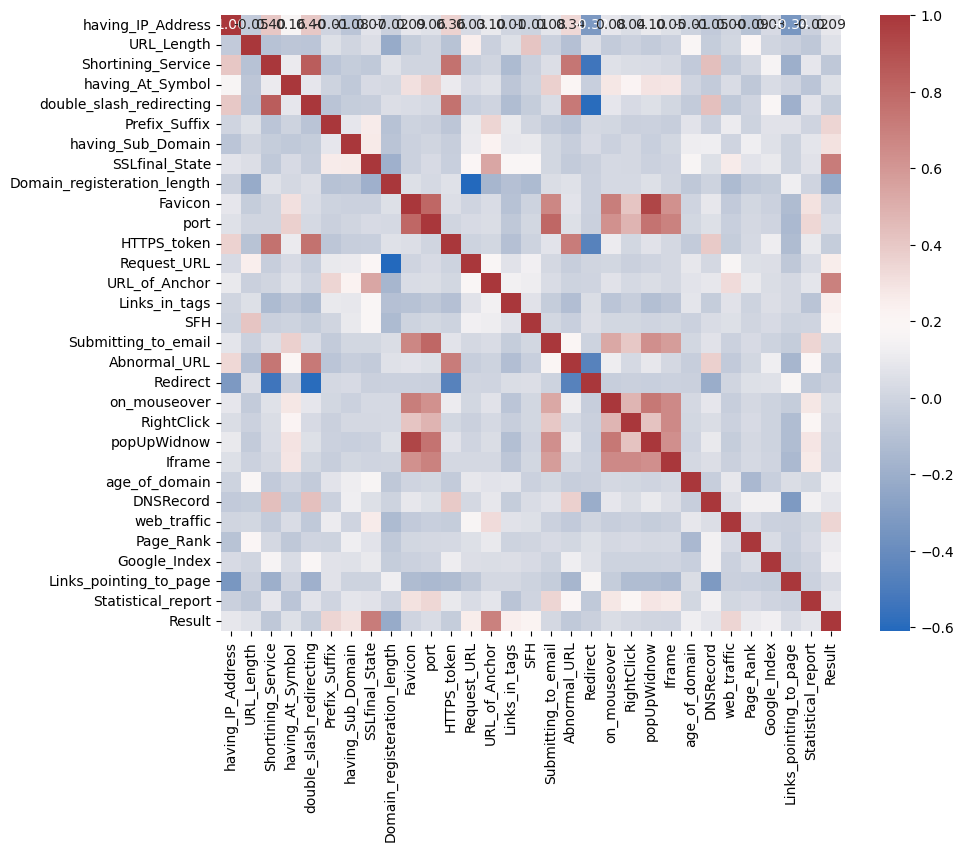

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='vlag')
plt.show()

# Data Preprocessing:

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# OnehotEncoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(df)


# Preparing Data:

In [ ]:
X = X_processed[:, :-1]
y = X_processed[:, -1]

# Setting data for Tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Data Cleaning:

In [ ]:
# Checking Missing Values
print("Missing values:")
print(df.isnull().sum())

# Checking for Duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate entries:")
print(duplicate_rows)

# Removing Missing and Duplicate Valuess
df = df.dropna()
df = df.drop_duplicates()

Missing values:
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report         

# Defining the Model:

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

input_dim = X.shape[1]
model = SimpleNN(input_dim)

# Training the Model:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initializing Number of Epochs and Runs
num_epochs = 10
num_runs = 10
avg_accuracy = 0
all_val_losses = []

# Training Loop:

In [ ]:
for run in range(num_runs):
    # Splitting the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=run)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)

    val_losses = []
    for epoch in range(num_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            val_losses.append(val_loss.item())  # Storing loss for each epoch

        print(f'Epoch [{run+1}/{num_runs}], Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss.item():.4f}')

    all_val_losses.append(val_losses)  # Store loss for each run

    # calculating accuracy
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        _, predicted = torch.max(val_outputs, 1)
        accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy())
    avg_accuracy += accuracy

# Calculating Average Accuracy
avg_accuracy /= num_runs

Epoch [1/10], Epoch [1/10], Val Loss: 0.6806
Epoch [1/10], Epoch [2/10], Val Loss: 0.6751
Epoch [1/10], Epoch [3/10], Val Loss: 0.6696
Epoch [1/10], Epoch [4/10], Val Loss: 0.6640
Epoch [1/10], Epoch [5/10], Val Loss: 0.6585
Epoch [1/10], Epoch [6/10], Val Loss: 0.6529
Epoch [1/10], Epoch [7/10], Val Loss: 0.6471
Epoch [1/10], Epoch [8/10], Val Loss: 0.6408
Epoch [1/10], Epoch [9/10], Val Loss: 0.6339
Epoch [1/10], Epoch [10/10], Val Loss: 0.6263
Epoch [2/10], Epoch [1/10], Val Loss: 0.6158
Epoch [2/10], Epoch [2/10], Val Loss: 0.6066
Epoch [2/10], Epoch [3/10], Val Loss: 0.5965
Epoch [2/10], Epoch [4/10], Val Loss: 0.5857
Epoch [2/10], Epoch [5/10], Val Loss: 0.5740
Epoch [2/10], Epoch [6/10], Val Loss: 0.5614
Epoch [2/10], Epoch [7/10], Val Loss: 0.5477
Epoch [2/10], Epoch [8/10], Val Loss: 0.5330
Epoch [2/10], Epoch [9/10], Val Loss: 0.5173
Epoch [2/10], Epoch [10/10], Val Loss: 0.5008
Epoch [3/10], Epoch [1/10], Val Loss: 0.4848
Epoch [3/10], Epoch [2/10], Val Loss: 0.4678
Epoch [3

# Result:

In [ ]:
print(f'Average Overall Accuracy on Validation Set: {avg_accuracy * 100:.2f}%')

Average Overall Accuracy on Validation Set: 93.14%


# Plotting Result:

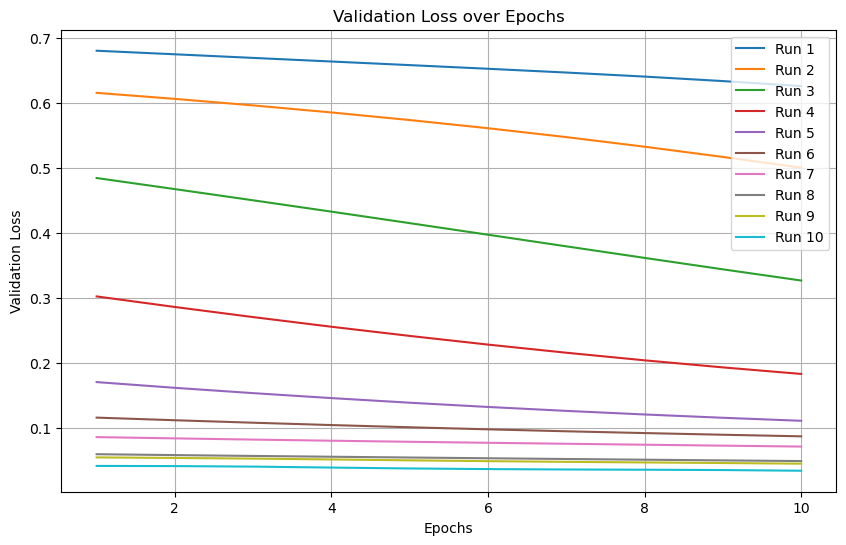

In [ ]:
plt.figure(figsize=(10, 6))
for i, val_loss_run in enumerate(all_val_losses):
    plt.plot(range(1, num_epochs + 1), val_loss_run, label=f'Run {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning:

# Importing Libraries:

In [ ]:
import pandas as pd
from scipy.io import arff
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Loading Dataset:

In [ ]:
data, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data)

# Data Preprocessing:

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(df)
X = X_processed[:, :-1]
y = X_processed[:, -1]

# Splitting Dataset:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Defining the Model:

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Hyperparameter Tuning:

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
num_epochs_options = [5, 10, 15, 20]
best_accuracy = 0
best_lr = 0
best_epoch = 0
for lr in learning_rates:
    for num_epochs in num_epochs_options:
        model = SimpleNN(X.shape[1])
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                _, predicted = torch.max(val_outputs, 1)
                val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy())
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_lr = lr
                best_epoch = num_epochs
        print(f'LR: {lr}, Epochs: {num_epochs}, Val Accuracy: {val_accuracy:.4f}')

LR: 0.01, Epochs: 5, Val Accuracy: 0.9263
LR: 0.01, Epochs: 10, Val Accuracy: 0.9760
LR: 0.01, Epochs: 15, Val Accuracy: 0.9765
LR: 0.01, Epochs: 20, Val Accuracy: 0.9955
LR: 0.001, Epochs: 5, Val Accuracy: 0.5676
LR: 0.001, Epochs: 10, Val Accuracy: 0.7191
LR: 0.001, Epochs: 15, Val Accuracy: 0.9073
LR: 0.001, Epochs: 20, Val Accuracy: 0.9457
LR: 0.0001, Epochs: 5, Val Accuracy: 0.5676
LR: 0.0001, Epochs: 10, Val Accuracy: 0.6793
LR: 0.0001, Epochs: 15, Val Accuracy: 0.5676
LR: 0.0001, Epochs: 20, Val Accuracy: 0.5676


# Results:

In [ ]:
print(f'Best Accuracy: {best_accuracy * 100:.2f}%, Best Learning Rate: {best_lr}, Best Epoch: {best_epoch}')

Best Accuracy: 99.55%, Best Learning Rate: 0.01, Best Epoch: 20


# Plotting the Result:

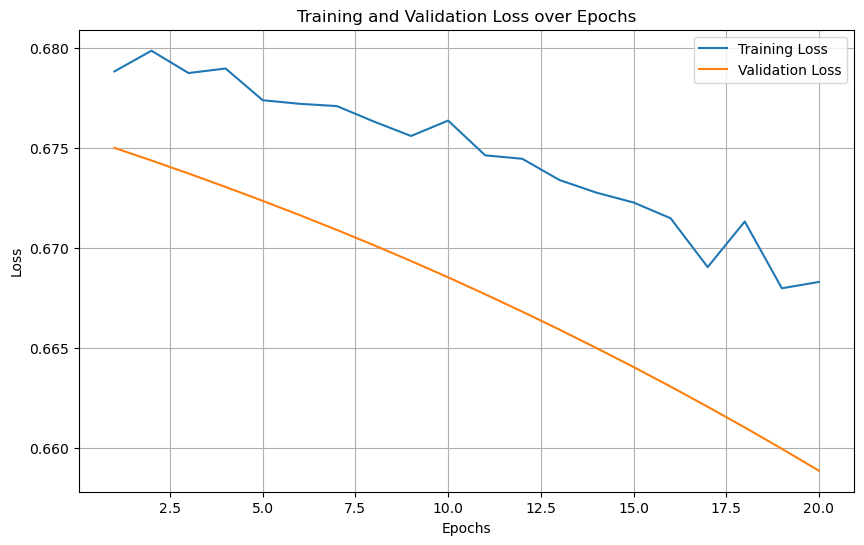

In [ ]:
import matplotlib.pyplot as plt

# Storing loss values
train_losses = []
val_losses = []

# Training
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion:

In conclusion, this project successfully leveraged deep learning techniques to address the task of Classification of dataset to check wether a webshite is a phishing website or not.
The trained model achieved 93.14% Accuracy on the test set, demonstrating an excellent Model.

!~~~~ END ~~~~!